In [1]:
#%reset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
import scipy.stats
from scipy import interpolate
from scipy.interpolate import griddata

# 2. De partículas a una malla. Usa la rutina scipy.interpolate.griddata. Sugerencia revisa el ejemplo de las notas de clase y el de la página anterior.

In [3]:
# Anillos

L = 1000 #tamaño de la caja
r1 = 200 #radio base
dr = 50
r2 = r1 + dr
r3 = r2 + dr
ro = 0.01

vol_an1 = (r2**2 - r1**2) * np.pi
vol_an2 = (r3**2 - r2**2) * np.pi

n1 = round(vol_an1 * ro)
n2 = round(vol_an2 * ro)
n = n1 + n2
#n

In [4]:
theta_an1 = 2 * np.pi * np.random.rand(n1)
theta_an2 = 2 * np.pi * np.random.rand(n2)
theta_an1.sort()
theta_an2.sort()

R1 = r1 + np.random.rand(n1) * dr #radios aleatorios
R2 = r2 + np.random.rand(n2) * dr #radios aleatorios

#coordenadas de los anillos
an1x = R1 * np.cos( theta_an1 )
an1y = R1 * np.sin( theta_an1 )

an2x = R2 * np.cos( theta_an2 )
an2y = R2 * np.sin( theta_an2 )

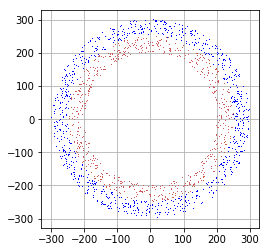

In [5]:
plt.plot(an1x, an1y,',',color='indianred')
plt.plot(an2x, an2y,',',color='b')
plt.axis('scaled')
plt.grid()

In [6]:
anillos_x = np.concatenate((an1x, an2x))
anillos_y = np.concatenate((an1y, an2y))

# a) Crea una malla de 100x100, e interpola los datos del anillo y de los multiples anillos a esta malla. Grafíca los datos de la malla como gráfica de densidad y pon los puntos originales encimados. Llamaremos a esta malla y sus valores, el campo. Utiliza los tres métodos de interpolación: más cercano, lineal y cúbico 1D.

In [7]:
w1 = 2
w2 = 0.5
wr = 1
bins = 100
rmax = 650

In [8]:
L = 1000
dx = 10 #50
n_lado = int(L/dx + 1)
mgrid = np.lib.index_tricks.nd_grid()
malla_x, malla_y = mgrid[ 0:L+dx:dx, 0:L+dx:dx ]
grid_x, grid_y = mgrid[ 0:L:dx, 0:L:dx ]
malla_x = malla_x.flatten()
malla_y = malla_y.flatten()
n_malla = len(malla_x)

#n_malla

In [9]:
ansx = anillos_x + L/2
ansy = anillos_y + L/2

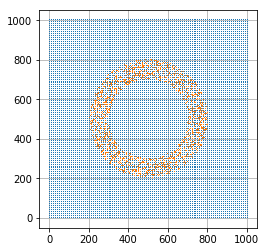

In [10]:
plt.plot(malla_x,malla_y,',');
plt.plot(ansx,ansy,',')
plt.axis('scaled')
plt.grid()

In [11]:
# Mas cercano

cercano = np.zeros((n_lado,n_lado))
weight = w1
for i in range(n):
    if i >= n1:
        weight = w2
    where_x = int(round(((ansx[i]+(dx/2))/dx) + 0.5) - 1)
    where_y = int(round(((ansy[i]+(dx/2))/dx) + 0.5) - 1)
    cercano[where_x,where_y]+= weight

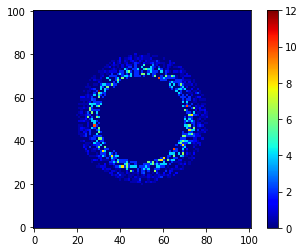

In [12]:
plt.imshow(cercano,cmap='jet',origin='lower')
plt.colorbar();

In [13]:
cercano_f = cercano.flatten()
a = []
b = []
c = []
for i in range(n_malla):
    if cercano_f[i] != 0:
        a.append(malla_x[i])
        b.append(malla_y[i])
        c.append(cercano_f[i])

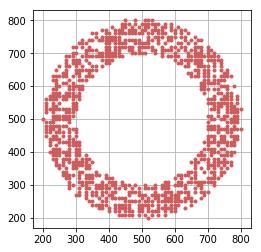

In [43]:
plt.plot(a,b,'.', color = 'indianred')
plt.axis('scaled')
plt.grid()

In [15]:
ab = np.zeros((len(a),2))
c_n = np.zeros((len(a)))
for i in range(len(a)):
    ab[i] = (a[i],b[i])
    c_n[i] = c[i]

In [16]:
grid_z0 = griddata(ab, c_n, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(ab, c_n, (grid_x, grid_y), method='linear')
grid_z2 = griddata(ab, c_n, (grid_x, grid_y), method='cubic')

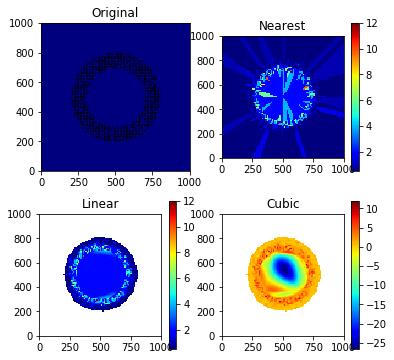

In [17]:
m=0
M=1000

plt.subplot(221)
plt.imshow((np.zeros((len(grid_x),len(grid_y)))).T, extent=(m,M,m,M), origin='lower',cmap='jet')
plt.plot(ab[:,0], ab[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(m,M,m,M), origin='lower',cmap='jet')
plt.title('Nearest')
plt.colorbar();

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(m,M,m,M), origin='lower',cmap='jet')
plt.title('Linear')
plt.colorbar();

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(m,M,m,M), origin='lower',cmap='jet')
plt.title('Cubic')
plt.colorbar();

plt.gcf().set_size_inches(6, 6)
plt.show()

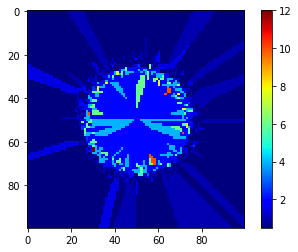

In [18]:
plt.imshow(grid_z0,cmap='jet')
plt.colorbar();

# Multianillos

In [19]:
""" multiples anillos"""
nm = 50
an = 10
radiosm_m = 290
radiosm_M = 300

drs = radiosm_M - radiosm_m 
mans_x = np.zeros((an,nm))
mans_y = np.zeros((an,nm))

for i in range(an):
    
    centro_x = np.random.rand() * (L - 2*radiosm_M) + radiosm_M
    centro_y = np.random.rand() * (L - 2*radiosm_M) + radiosm_M
    theta_mans = 2 * np.pi * np.random.rand(nm)
    radio_mans = drs * np.random.rand(nm) + radiosm_m

    mans_x[i] = radio_mans * np.cos( theta_mans ) + centro_x
    mans_y[i] = radio_mans * np.sin( theta_mans ) + centro_y

mans_x = mans_x.flatten() 
mans_y = mans_y.flatten() 

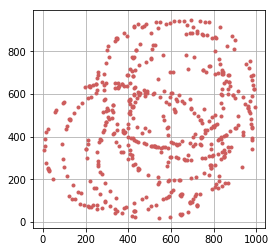

In [37]:
plt.plot(mans_x, mans_y, '.', color = 'indianred')
plt.axis('scaled')
plt.grid()

In [21]:
# Mas cercano
cercanom = np.zeros((n_lado,n_lado))
weight = 1
for i in range(nm*an):
    where_x = int(round(((mans_x[i]+(dx/2))/dx) + 0.5) - 1)
    where_y = int(round(((mans_y[i]+(dx/2))/dx) + 0.5) - 1)
    cercanom[where_x,where_y]+= weight

In [22]:
cercanom_f = cercanom.flatten()
am = []
bm = []
cm = []
for i in range(n_malla):
    if cercanom_f[i] != 0:
        am.append(malla_x[i])
        bm.append(malla_y[i])
        cm.append(cercanom_f[i])

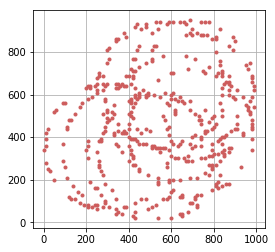

In [38]:
plt.plot(am,bm,'.', color = 'indianred')
plt.axis('scaled')
plt.grid()

In [24]:
abm = np.zeros((len(am),2))
c_nm = np.zeros((len(am)))
for i in range(len(am)):
    abm[i] = (am[i],bm[i])
    c_nm[i] = cm[i]

In [25]:
grid_zm0 = griddata(abm, c_nm, (grid_x, grid_y), method='nearest')
grid_zm1 = griddata(abm, c_nm, (grid_x, grid_y), method='linear')
grid_zm2 = griddata(abm, c_nm, (grid_x, grid_y), method='cubic')

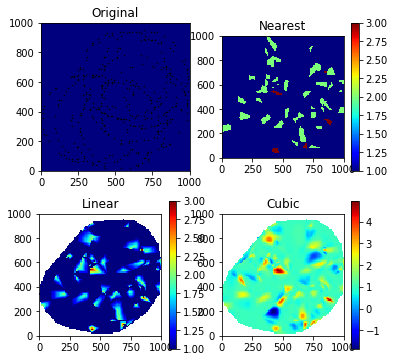

In [26]:
m=0
M=1000
plt.subplot(221)
plt.imshow((np.zeros((len(grid_x),len(grid_y)))).T, extent=(m,M,m,M), origin='lower',cmap='jet')
plt.plot(abm[:,0], abm[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_zm0.T, extent=(m,M,m,M), origin='lower',cmap='jet')
plt.title('Nearest')
plt.colorbar();

plt.subplot(223)
plt.imshow(grid_zm1.T, extent=(m,M,m,M), origin='lower',cmap='jet')
plt.title('Linear')
plt.colorbar();

plt.subplot(224)
plt.imshow(grid_zm2.T, extent=(m,M,m,M), origin='lower',cmap='jet')
plt.title('Cubic')
plt.colorbar();

plt.gcf().set_size_inches(6, 6)
plt.show()

# b) Calcula la función de correlación (estimador de Landy-Salay) para ambas muestras de datos usando los putos de la malla, y asignando un peso en cada punto dado por el valor del campo en ese punto. Grafica la función de correlación obtenida por este método de malla y compárala en la misma gráfica con la obtenida en base a los puntos originales. ¿Se parecen? ¿Dónde cambia? ¿Cómo cambia con los diferentes métodos de interpolación?

In [30]:
# Funcioes on Peso
def DD_Pesos(sx,sy,w,n,bins,rmax=100):
    dt = rmax/bins
    hist = np.zeros(bins)
    rango = np.arange(dt/2,rmax+(dt/2),dt)
    norm = 0
    
    for i in range(n):
        for j in range(i+1,n):
            dist = (( sx[i]-sx[j] )**2 + (sy[i]-sy[j])**2)**(1/2)
            where = int(round((dist/dt) + 0.5) - 1)
            if where < bins:
                hist[where] = hist[where] + w[i] * w[j]
            norm += w[i]*w[j] 

    hist = hist/norm
    return rango, hist
#--------------------------------------------------------------------------------------------------

def DR_Pesos(sx,sy,w,wr,n,bins,L,rmax=100):
    nd = len(sx)
    dt = rmax/bins
    hist = np.zeros(bins)
    
    np.random.seed(42)
    
    ran_x, ran_y = np.random.rand(2,n) * L
    rango = np.arange(dt/2,rmax+(dt/2),dt)
    norm = 0
    for i in range(nd):
        for j in range(n):
            dist = (( sx[i]-ran_x[j] )**2 + (sy[i]-ran_y[j])**2)**(1/2)
            where = int(round((dist/dt) + 0.5) - 1)
            if where < bins:
                hist[where] = hist[where] + w[i]*wr
            norm += w[i]*wr
            
    hist = hist/norm
    return rango, hist
#--------------------------------------------------------------------------------------------------

def RR_Pesos(wr,L,bins,n,rmax=100):
    dt = rmax/bins
    hist = np.zeros(bins)
    np.random.seed(42)
    samp_x, samp_y = np.random.rand(2,n) * L
    rango = np.arange(dt/2,rmax+(dt/2),dt)
    for i in range(n):
        for j in range(i+1,n):
            dist = (( samp_x[i]-samp_x[j] )**2 + (samp_y[i]-samp_y[j])**2)**(1/2)
            where = int(round((dist/dt) + 0.5) - 1)
            if where < bins:
                hist[where] = hist[where] + wr*wr
    norm = (n*(n-1)/2)*wr
    hist = hist/norm
    return rango, hist

In [31]:
def Corr_Pesos(sx,sy,w,wr,n,L,bins,rmax=100):
    
    np.random.seed(42)
    
    dd = DD_Pesos(sx,sy,w,n,bins,rmax)
    dr = DR_Pesos(sx,sy,w,wr,n,bins,L,rmax)
    rr = RR_Pesos(wr,L,bins,n,rmax)
    rango = dd[0]
    return dd[1], dr[1], rr[1], rango


In [47]:
"""prefijo m,M-Multianillos, "M" son datos originales y "m" son los datos con pesos"""

'prefijo m,M-Multianillos, "M" son datos originales y "m" son los datos con pesos'

In [32]:
mdd, mdr, mrr, mrango = Corr_Pesos(am,bm,cm,1,len(am),L,100,700)

In [33]:
Mdd, Mdr, Mrr, Mrango = Corr_Pesos(mans_x,mans_y,np.ones(len(mans_x)),1,len(am),L,100,700)

In [34]:
dd, dr, rr, rango = Corr_Pesos(a,b,c,1,len(a),L,100,700)

In [35]:
pesosans = np.zeros(n)
weight = w1
for i in range(n):
    if i >= n1:
        weight = w2
    pesosans[i] = weight

In [39]:
Dd, Dr, Rr, Rango = Corr_Pesos(anillos_x, anillos_y, pesosans,1,len(anillos_x),L,100,700)

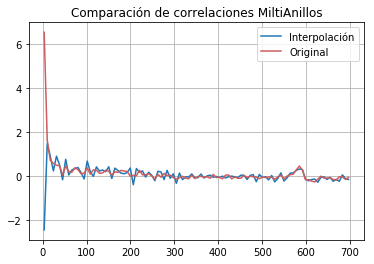

In [44]:
LSm = ((mdd - 2*mdr + mrr)/mrr)
LSM = ((Mdd - 2*Mdr + Mrr)/Mrr)

plt.plot(mrango,LSm,label='Interpolación')
plt.plot(Mrango,LSM,label='Original', color = 'indianred')
plt.title('Comparación de correlaciones MiltiAnillos')
plt.legend()
plt.grid()

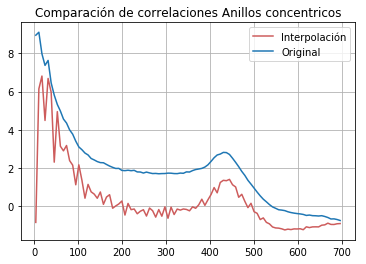

In [45]:
LS = ((dd-2*dr+rr)/rr)
LSO = ((Dd-2*Dr+Rr)/Rr)

plt.plot(rango,LS,label='Interpolación', color = 'indianred')
plt.plot(Rango,LSO,label='Original')
plt.title('Comparación de correlaciones Anillos concentricos')
plt.legend()
plt.grid()

# c) Calcula la transformada de Fourier de este campo discreto (ie de la malla) para ambas muestras de datos, y obtén los espectros de potencia como el valor de expectación del producto de dos campos en este espacio de Fourier. Gráfica tanto el campo en el espacio de Fourier, como el espectro de potencias. ¿Cómo cambian los resultados del espectro de potencias con los diferentes métodos de interpolación?

In [62]:
def Pot(x,y,w,k_x,k_y):
    p = 0
    for i in range(len(x)):
        p = p + np.exp(-1j*w[i]*(k_x*x[i]+k_y*y[i]))
    return p


def Potencias(x,y,w,bins,V):
    x = x.flatten()
    y = y.flatten()
    N = len(x)
    dk = (2*pi)/bins
    k = np.arange(0, 2*pi, dk)
    P_k = np.zeros(bins)
    for i in range(bins):
        P_k[i] = (V/(N**2)) * abs(Pot(x, y, w, k[i], k[0]))**2 - (V/N)
    
    plt.plot(k,P_k, color = 'indianred');
    return P_k


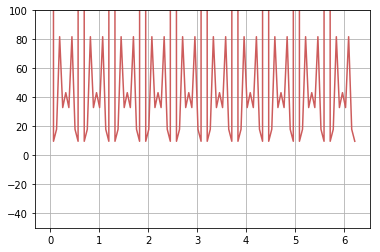

In [63]:
Pot_anillos = Potencias(abm[:,0],abm[:,1],cm,100,100*100);
plt.ylim(-50, 100);
plt.grid()

In [64]:
Fft_multians = scipy.fft(Pot_anillos)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


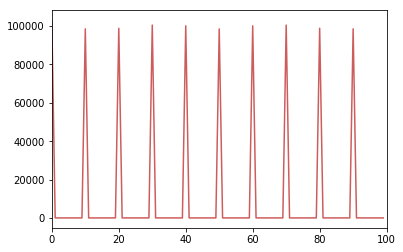

In [65]:
plt.plot(Fft_multians, color = 'indianred')
plt.xlim(0, 100);

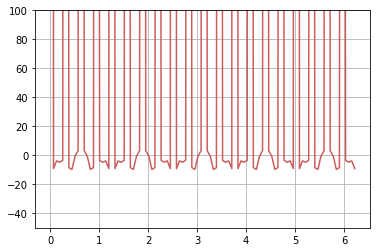

In [66]:
Pot_an = Potencias(ab[:,0],ab[:,1],c,100,100*100);
plt.ylim(-50, 100);
plt.grid()

In [67]:
Fft_ans = scipy.fft(Pot_an)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


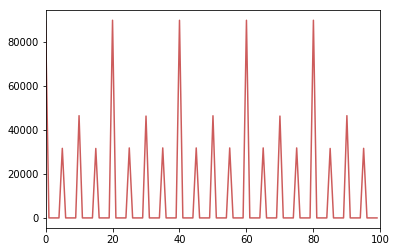

In [68]:
plt.plot(Fft_ans, color = 'indianred')
plt.xlim(0, 100);

# d) Utiliza la transformada de Fourier inversa para encontrar la función de correlación a partir de los espectros de potencia anteriores, y compáralos con los que encontraste en el inciso b).

In [69]:
FftIn_anillos = np.fft.ifft(Fft_multians)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


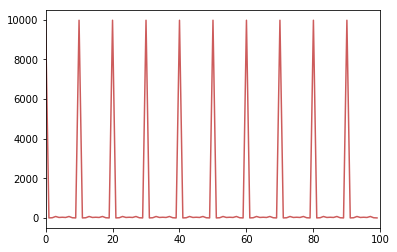

In [70]:
plt.plot(FftIn_anillos, color = 'indianred')
plt.xlim(0, 100);

In [60]:
FftIn_an = np.fft.ifft(Fft_ans)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


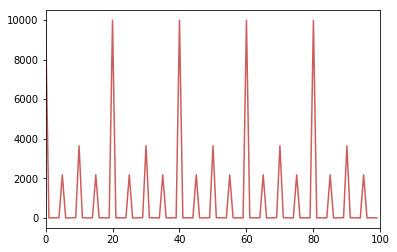

In [71]:
plt.plot(FftIn_an, color = 'indianred')
plt.xlim(0, 100);

LA FFT iversa no cambió nada, y hasta dnde yo recuerdo eso tiene sentido porque recuerdo en la lic. haber trabajado con fft y alguien me había dicho que una vez que filtramos los datos, incluso si los fft inverseamos no va a regresar todo el ruido anterior.